## Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 - Data Loading and Preprocessing

In [9]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
import warnings
warnings.filterwarnings('ignore')

def handle_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)
    return df

df = handle_missing_values(df)


In [13]:
def encode_categorical(df):
    df = pd.get_dummies(df, drop_first=True)
    return df

df = encode_categorical(df)

In [15]:
def train_test_split(df, target_column, test_size=0.2, random_state=42):

    np.random.seed(random_state)
    
    indices = np.random.permutation(len(df))
    test_count = int(len(df) * test_size)
    
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]
    
    train_df = df.iloc[train_indices]
    test_df = df.iloc[test_indices]
    
    X_train = train_df.drop(columns=[target_column]).values
    y_train = train_df[target_column].values.reshape(-1, 1)
    
    X_test = test_df.drop(columns=[target_column]).values
    y_test = test_df[target_column].values.reshape(-1, 1)
    
    return X_train, X_test, y_train, y_test

target_column = "price"
X_train, X_test, y_train, y_test = train_test_split(df, target_column)


In [18]:
def standardize_train_test(X_train, X_test):
    
    X_train = np.array(X_train, dtype=np.float64)
    X_test = np.array(X_test, dtype=np.float64)

    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    std[std == 0] = 1

    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std

    return X_train_scaled, X_test_scaled, mean, std

X_train, X_test, mean, std = standardize_train_test(X_train, X_test)

In [19]:
def add_bias(X):
    
    ones = np.ones((X.shape[0], 1))
    return np.hstack((ones, X))

X_train = add_bias(X_train)
X_test = add_bias(X_test)

## Part 2 - Linear Model

In [21]:
def predict(X, weights):
    return np.dot(X, weights)

## Part 3 - Training Algorithm

In [22]:
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [23]:
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros((n_features, 1))
    loss_history = []
    for epoch in range(epochs):
        y_pred = predict(X, weights)
        error = y_pred - y
        gradient = (2/n_samples) * np.dot(X.T, error)
        weights -= learning_rate * gradient
        loss = compute_mse(y, y_pred)
        loss_history.append(loss)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return weights, loss_history

In [28]:
weights, loss_history = gradient_descent(
    X_train,
    y_train,
    learning_rate=0.001,
    epochs=1000
)

Epoch 0, Loss: 25234792406487.6133
Epoch 100, Loss: 16653663783716.0508
Epoch 200, Loss: 11271631922834.8945
Epoch 300, Loss: 7800175336014.6572
Epoch 400, Loss: 5523108312882.0566
Epoch 500, Loss: 4014804529386.9678
Epoch 600, Loss: 3010072442347.4277
Epoch 700, Loss: 2338588184246.3032
Epoch 800, Loss: 1888933897774.3003
Epoch 900, Loss: 1587442240560.1101


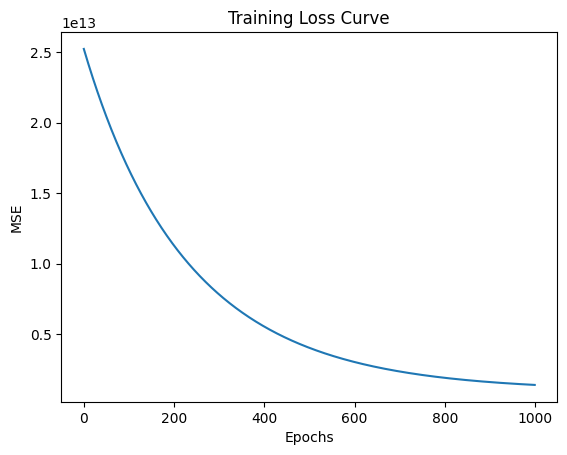

In [29]:
plt.plot(loss_history)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

## Part 4 - Testing and Evaluation

In [30]:
def evaluate_model(X_test, y_test, weights):
    y_pred = predict(X_test, weights)
    mse = compute_mse(y_test, y_pred)
    return mse, y_pred

test_mse, y_pred = evaluate_model(X_test, y_test, weights)
print("Test MSE:", test_mse)

Test MSE: 2341639115338.495


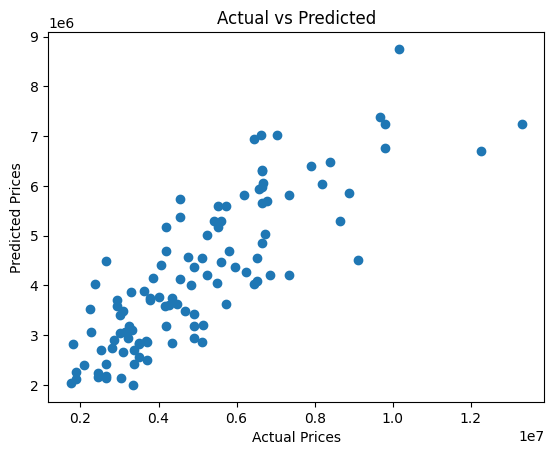

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()
